# Pisa 2012 Data Exploration
### by Gabriela Sikora

## Introduction
This notebook will be dedicated to exploring details of the PISA 2012 dataset. PISA, in particular, is a "survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school" (Udacity, 2019).

Within this datset we can find information for about 510,000 students. The PISA 2012 dataset includes information on mathematics, reading in the test language, and science.


Throughout the course of this notebook I will have these two questions in mind:

- Are there differences in achievement based on gender or parental education levels?
- Is there a relationship between the amount of time a student dedicates to learning and their score? 

## Preliminary Wrangling 
To begin, let's start off by assessing the dataset and cleaning any remaining issues.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read in the cleaned csv that was created in the wrangle_pisa notebook
pisa = pd.read_csv('pisa_df.csv')

### Assessing and Cleaning the Data

#### General

In [3]:
# How many rows and variables the dataset holds
pisa.shape

(15167, 19)

In [4]:
# What are the data types of the variables
pisa.dtypes

Country                                           object
Student ID                                         int64
Gender                                            object
Out-of-School Study Time - Homework              float64
Out-of-School Study Time - Guided Homework       float64
Out-of-School Study Time - Personal Tutor        float64
Out-of-School Study Time - Commercial Company    float64
Out-of-School Study Time - With Parent           float64
Learning Time - Mathematics                      float64
Learning Time - Test Language                    float64
Learning Time - Science                          float64
Average Math Score                               float64
Average Reading Score                            float64
Average Science Score                            float64
Average Total Score                              float64
Education - Father                                object
Education - Mother                                object
Out-of-School Study Time - Tota

In [5]:
# See 10 examples of data in the dataset 
pisa.sample(10)

,Country,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
4209,Italy,29960,Male,1.0,0.0,0.0,0.0,0.0,240.0,240.0,240.0,546.43248,538.40768,533.23386,539.358007,Upper secondary,Short-cycle tertiary,1.0,720.0
1643,Canada,16457,Female,16.0,14.0,1.0,0.0,3.0,495.0,495.0,330.0,526.18008,578.57944,573.14436,559.301293,Short-cycle tertiary,Bachelor’s or equivalent,34.0,1320.0
1473,Jordan,5755,Female,2.0,2.0,1.0,0.0,2.0,225.0,270.0,315.0,398.82382,451.01324,420.49610,423.444387,Short-cycle tertiary,Bachelor’s or equivalent,7.0,810.0
14208,Italy,29942,Female,5.0,2.0,4.0,0.0,1.0,220.0,330.0,110.0,345.70026,426.62790,447.07200,406.466720,Short-cycle tertiary,Lower secondary,12.0,660.0
12510,Mexico,32286,Male,4.0,1.0,0.0,0.0,2.0,480.0,240.0,480.0,469.62920,452.27876,454.90488,458.937613,Short-cycle tertiary,Upper secondary,7.0,1200.0
8790,Mexico,20257,Male,3.0,2.0,1.0,3.0,0.0,250.0,120.0,200.0,514.88550,496.54614,471.59642,494.342687,Short-cycle tertiary,Short-cycle tertiary,9.0,570.0
3943,Italy,28757,Male,10.0,0.0,0.0,0.0,0.0,150.0,200.0,100.0,570.03424,552.52192,514.67734,545.744500,Bachelor’s or equivalent,Short-cycle tertiary,10.0,450.0
2681,Spain,17111,Male,2.0,0.0,0.0,0.0,0.0,200.0,150.0,165.0,494.16574,484.03578,518.03428,498.745267,Short-cycle tertiary,Short-cycle tertiary,2.0,515.0
3207,Netherlands,4116,Male,21.0,0.0,0.0,0.0,0.0,150.0,150.0,500.0,657.50896,573.29228,687.74710,639.516113,Bachelor’s or equivalent,Short-cycle tertiary,21.0,800.0
11219,Mexico,26197,Female,2.0,2.0,0.0,0.0,0.0,225.0,135.0,180.0,425.61924,439.89288,408.18724,424.566453,Upper secondary,Upper secondary,4.0,540.0


In [6]:
# Decriptive statistics for each numeric variable
pisa.describe()

,Student ID,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Out-of-School Study Time - Total,Learning Time - Total
count,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000,15167.000000
mean,16988.039626,6.673370,1.608031,0.825674,0.688271,1.093624,246.463374,242.097119,228.560823,503.980473,506.784609,508.320475,506.361852,10.888969,717.121316
std,9561.527074,5.791363,2.485229,1.946453,1.911433,2.073632,90.533247,94.357716,133.939948,90.423852,87.835595,88.778732,85.568534,9.083546,252.006634
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.104220,143.690300,144.479680,162.424733,0.000000,0.000000
25%,9031.500000,2.000000,0.000000,0.000000,0.000000,0.000000,200.000000,200.000000,135.000000,438.627520,447.627480,445.300260,445.497293,5.000000,550.000000
50%,17275.000000,5.000000,1.000000,0.000000,0.000000,0.000000,240.000000,225.000000,200.000000,503.201440,510.427600,509.175700,508.154200,9.000000,660.000000
75%,25033.500000,9.000000,2.000000,1.000000,0.000000,1.000000,285.000000,275.000000,300.000000,568.125880,569.683140,573.237600,568.191293,14.000000,810.000000
max,33806.000000,30.000000,30.000000,30.000000,30.000000,30.000000,1440.000000,1800.000000,1920.000000,796.627180,790.138200,834.800440,767.428960,122.000000,3000.000000


#### Parental Education

In [7]:
# The type and quantity of the educational levels for 'Education - Father'
pisa['Education - Father'].value_counts()

Short-cycle tertiary        6509
Bachelor’s or equivalent    5298
Upper secondary             1244
Post-secondary               900
Lower secondary              881
Primary                      232
Early childhood              103
Name: Education - Father, dtype: int64

In [8]:
# The type and quantity of the educational levels for 'Education - Mother'
pisa['Education - Mother'].value_counts()

Short-cycle tertiary        7086
Upper secondary             2338
Bachelor’s or equivalent    2303
Lower secondary             1582
Post-secondary              1150
Primary                      489
Early childhood              219
Name: Education - Mother, dtype: int64

In [9]:
# Convert parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

#### Scores

In [10]:
high_score = pisa[pisa['Average Total Score'] >= 785]
low_score = pisa[pisa['Average Total Score'] <= 630]

In [11]:
high_score.head()

,Country,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total


In [12]:
high_score.shape

(0, 19)

In [13]:
low_score.head()

,Country,Student ID,Gender,Out-of-School Study Time - Homework,Out-of-School Study Time - Guided Homework,Out-of-School Study Time - Personal Tutor,Out-of-School Study Time - Commercial Company,Out-of-School Study Time - With Parent,Learning Time - Mathematics,Learning Time - Test Language,Learning Time - Science,Average Math Score,Average Reading Score,Average Science Score,Average Total Score,Education - Father,Education - Mother,Out-of-School Study Time - Total,Learning Time - Total
0,Italy,28303,Female,12.0,2.0,2.0,0.0,0.0,180.0,240.0,120.0,528.28324,520.91252,522.88326,524.026340,Short-cycle tertiary,Bachelor’s or equivalent,16.0,540.0
1,Spain,16120,Male,6.0,5.0,6.0,6.0,0.0,180.0,180.0,180.0,592.70134,583.71758,652.49908,609.639333,Short-cycle tertiary,Bachelor’s or equivalent,23.0,540.0
2,Canada,21391,Male,12.0,5.0,9.0,6.0,2.0,300.0,375.0,150.0,453.73888,434.23498,476.25886,454.744240,Post-secondary,Bachelor’s or equivalent,34.0,825.0
4,Mexico,33705,Male,1.0,1.0,0.0,1.0,0.0,240.0,180.0,300.0,331.83520,272.16190,374.80420,326.267100,Short-cycle tertiary,Bachelor’s or equivalent,3.0,720.0
5,Mexico,23855,Male,6.0,1.0,0.0,0.0,0.0,180.0,150.0,90.0,594.88238,548.03102,598.69452,580.535973,Short-cycle tertiary,Bachelor’s or equivalent,7.0,420.0


In [14]:
pisa.shape

(15167, 19)

In [15]:
pisa['Student ID'].duplicated().sum()

0

In [16]:
pisa.drop_duplicates(inplace=True)

In [17]:
pisa.duplicated().sum()

0

In [18]:
pisa.shape

(15167, 19)

### The structure of the dataset

This cleaned version of the Pisa dataset from 2012 is composed of 43,715 rows, each of which represents one student. As for the features of this dataset, there are 18 variables that have been selected, most of which are numeric. Two of the variables are different however in that they are ordered categorical variables. They are the highest educational levels of the mother and father of the student, and are sorted from lowest level of education to highest level:

**(least educated) —> (most educated)** <br>
**<ISCED level 0>** : Pre-primary education <br>
**<ISCED level 1>** : Primary education or first stage of basic education<br>
**<ISCED level 2>** : Lower secondary education or second stage of basic education<br>
**<ISCED level 3>** : Upper secondary education<br>
**<ISCED level 4>** : Post-secondary non-tertiary education <br>
**<ISCED level 5>** : First stage of tertiary education<br>
**<ISCED level 6>** : Second stage of tertiary education <br>


### Main feature of interest in the dataset

The main feature that we will be exploring is the 'Average Total Score'. 

### Features that will support the investigation into 'Average Total Score'

To better understand the Average Total Score, I believe that 'Out-of-School Study Time - Total' and 'Learning time (minutes per week) - Total' will provide illuminating results. The average assumption is that the more homework a student completes, the better they will perform when writing tests, but there has been a recent uprise in research that explains that it is not a good predictor of test success. Rather, I expect that the educational level of the parents, and the amount of books that they have in their home will be a better feature to predict the student's test related success.

## Univariate Exploration

We can start off by looking at the main feature of interest: the average total score. 

In particular, let's first look at a standard-scale plot of this value to see its distribution.

In [19]:
color1 = '#a7d7c5'
color2 = '#74b49b'
color3 = '#5c8d89'
color_male = '#ff8162' 
color_female = '#ffcd60'
color_gends = ['#ffcd60', '#ff8162']
color_gends_r = ['#ff8162', '#ffcd60']

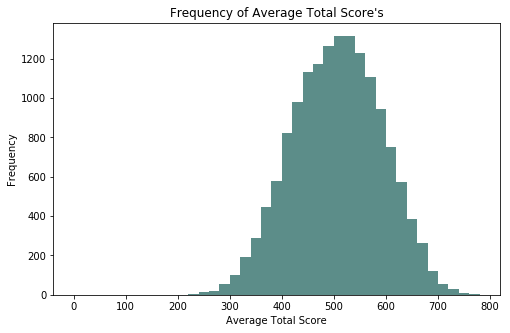

In [20]:
# Histogram of Average Total Score
binsize = 20
bins = np.arange(0, pisa['Average Total Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Total Score', bins = bins, color = color3)
plt.xlabel('Average Total Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Total Score\'s');

Here we can see that it is a very normal distribution. This is generally not surprising since bell curves are expected when it comes to the grades of students.

We can now move onto the three scores that the total score is comprised of: Math, Reading, and Science.

Text(0.5, 0, 'Average Math Score')

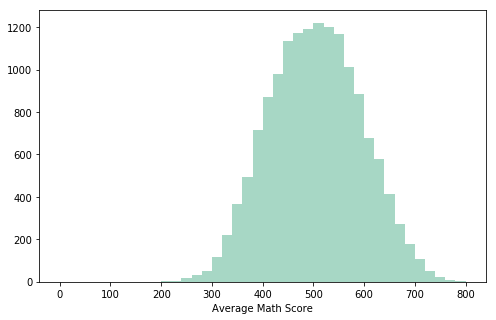

In [21]:
# Histogram of Average Math Score
binsize = 20
bins = np.arange(0, pisa['Average Math Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Math Score', bins=bins, color = color1)
plt.xlabel('Average Math Score')

Although the numbers along the x scale are a bit lower than they are for the total scores, we can easily say that this distribution is very much so like the total score in that it has a distinct normal distribution.

Text(0.5, 0, 'Average Reading Score')

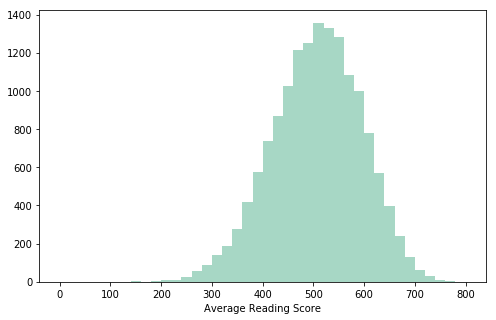

In [22]:
# Histogram of Average Reading Score
binsize = 20
bins = np.arange(0, pisa['Average Reading Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Reading Score', bins=bins, color = color1)
plt.xlabel('Average Reading Score')

Just as with the Math score, we can see the average Reading score is falling along a normal distribution.

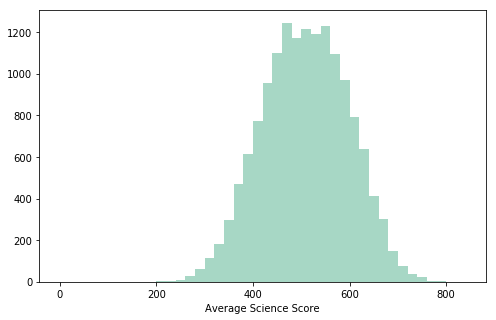

In [187]:
# Histogram of Average Science Score
binsize = 20
bins = np.arange(0, pisa['Average Science Score'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Average Science Score', bins=bins, color = color1)
plt.xlabel('Average Science Score');

Just as with the Total, Math, and Reading scores, we can see the Science score also falls along a normal distribution. 

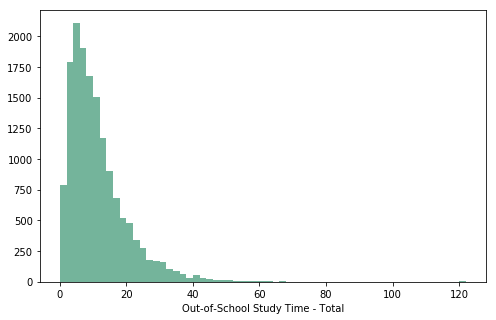

In [171]:
# Histogram of the Total Out-of-School Study Time
binsize = 2
bins = np.arange(0, pisa['Out-of-School Study Time - Total'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = color2, bins = bins)

plt.xlabel('Out-of-School Study Time - Total');


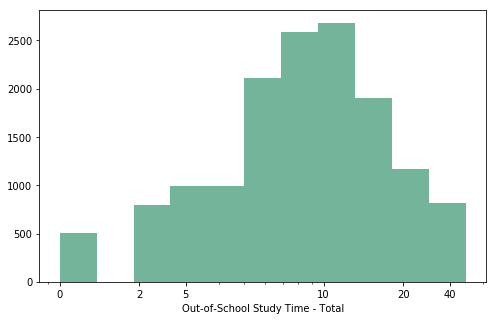

In [172]:
log_binsize = 0.2
bins = 5 ** np.arange(0, np.log10(pisa['Out-of-School Study Time - Total'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = color2, bins = bins)
plt.xscale('log')
plt.xticks([1e0, 2e0, 3e0, 1e1, 2e1, 3e1], [0, '2', '5', '10', '20', '40'])

plt.xlabel('Out-of-School Study Time - Total');

In [102]:
# Select high outliers for the out of school study time total, using criteria eyeballed from the plot
study_high_outliers = (pisa['Out-of-School Study Time - Total'] > 60)
print(study_high_outliers.sum())
print(pisa.loc[study_high_outliers,:])

31
                    Country  Student ID  Gender  \
776              Montenegro        2623    Male   
787                   Spain       25276  Female   
808              Luxembourg        1084    Male   
2038                 Canada        2364    Male   
2085                  Spain       15512  Female   
2139   United Arab Emirates       11043  Female   
2326              Australia       12415    Male   
2624                  Italy       24278  Female   
3580             Montenegro        3220    Male   
3783             Kazakhstan        5335  Female   
4656                  Spain        2328    Male   
5435                  Spain       25283    Male   
5558                 Mexico       30817  Female   
6754                  Italy       21740    Male   
6927                  Italy       27008  Female   
7057                  Italy       24308  Female   
7492              Australia       14238    Male   
8623                  Spain       18943    Male   
8873                  Spain 

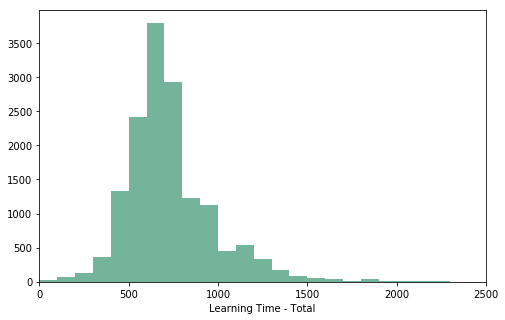

In [179]:
# Histogram of the Total Learning Time
binsize = 100
bins = np.arange(0, pisa['Learning Time - Total'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Total', color = color2, bins=bins)
plt.xlim(0, 2500)
plt.xlabel('Learning Time - Total');

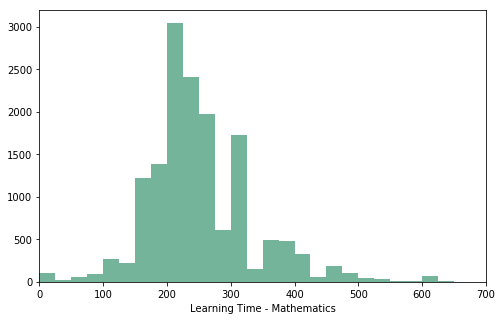

In [192]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Mathematics'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Mathematics', color = color2, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Mathematics');

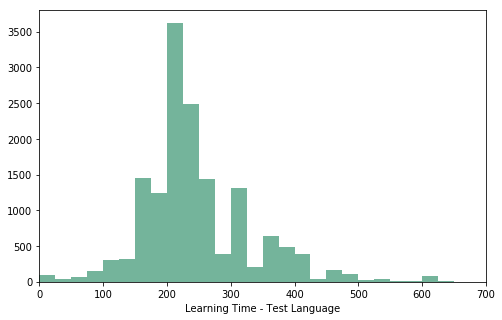

In [193]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Test Language'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Test Language', color = color2, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Test Language');

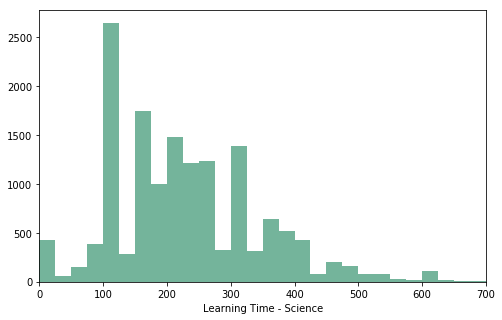

In [197]:
# Histogram of the Total Learning Time
binsize = 25
bins = np.arange(0, pisa['Learning Time - Science'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = pisa, x = 'Learning Time - Science', color = color2, bins=bins)
plt.xlim(0, 700)
plt.xlabel('Learning Time - Science');

In [204]:
# Select high outliers for the learning time total, using criteria eyeballed from the plot
high_outliers_math = (pisa['Learning Time - Mathematics'] > 600)

print(high_outliers_math.sum())
print(pisa.loc[high_outliers_math,:])

70
                        Country  Student ID  Gender  \
215                     Denmark        1626    Male   
486               Florida (USA)        1561    Male   
526                      Mexico       15126  Female   
1259                     Canada       14395  Female   
1813        Massachusetts (USA)        1435  Female   
1928                     Latvia        2110  Female   
1997                     Mexico       21587  Female   
2067                     Canada       17113    Male   
2622                     Mexico         554    Male   
3112                     Mexico       30815    Male   
3240       United Arab Emirates        7285    Male   
3714                     Canada       19278    Male   
3725       United Arab Emirates        6070  Female   
3757       United Arab Emirates        7660  Female   
4024                     Mexico       33486    Male   
4271                     Canada       17089    Male   
4294                     Canada         259    Male   
4557   

In [201]:
high_outliers_lang = (pisa['Learning Time - Test Language'] > 600)

print(high_outliers_lang.sum())
print(pisa.loc[high_outliers_lang,:])

62
                    Country  Student ID  Gender  \
215                 Denmark        1626    Male   
486           Florida (USA)        1561    Male   
1044   United Arab Emirates        7004  Female   
1259                 Canada       14395  Female   
1429                Denmark        7234  Female   
1732         United Kingdom       10803  Female   
1855    Massachusetts (USA)         587  Female   
1917                  Chile         167    Male   
1997                 Mexico       21587  Female   
2237   United Arab Emirates       10226    Male   
2622                 Mexico         554    Male   
3032                Denmark         784    Male   
3112                 Mexico       30815    Male   
3240   United Arab Emirates        7285    Male   
3642                 Mexico       32062    Male   
3714                 Canada       19278    Male   
4024                 Mexico       33486    Male   
4116                 Canada       12780    Male   
4271                 Canada 

In [202]:
high_outliers_sci = (pisa['Learning Time - Science'] > 600)

print(high_outliers_sci.sum())
print(pisa.loc[high_outliers_sci,:])

180
                    Country  Student ID  Gender  \
180                 Austria        2024    Male   
189    United Arab Emirates        6450    Male   
193       Connecticut (USA)         905  Female   
224                   Chile         462    Male   
265    United Arab Emirates        4439    Male   
269          China-Shanghai        5053    Male   
372                   Chile         234    Male   
486           Florida (USA)        1561    Male   
504    United Arab Emirates        2784  Female   
521    United Arab Emirates         523    Male   
528    United Arab Emirates         305  Female   
574    United Arab Emirates        1343    Male   
590                  Brazil       18569  Female   
606    United Arab Emirates        1200    Male   
665    United Arab Emirates        4740  Female   
718    United Arab Emirates        6230    Male   
1015                 Canada        3257  Female   
1225               Portugal        2432  Female   
1255               Thailand

In [205]:
pisa = pisa.loc[-high_outliers_math & -high_outliers_lang & -high_outliers_sci,:]

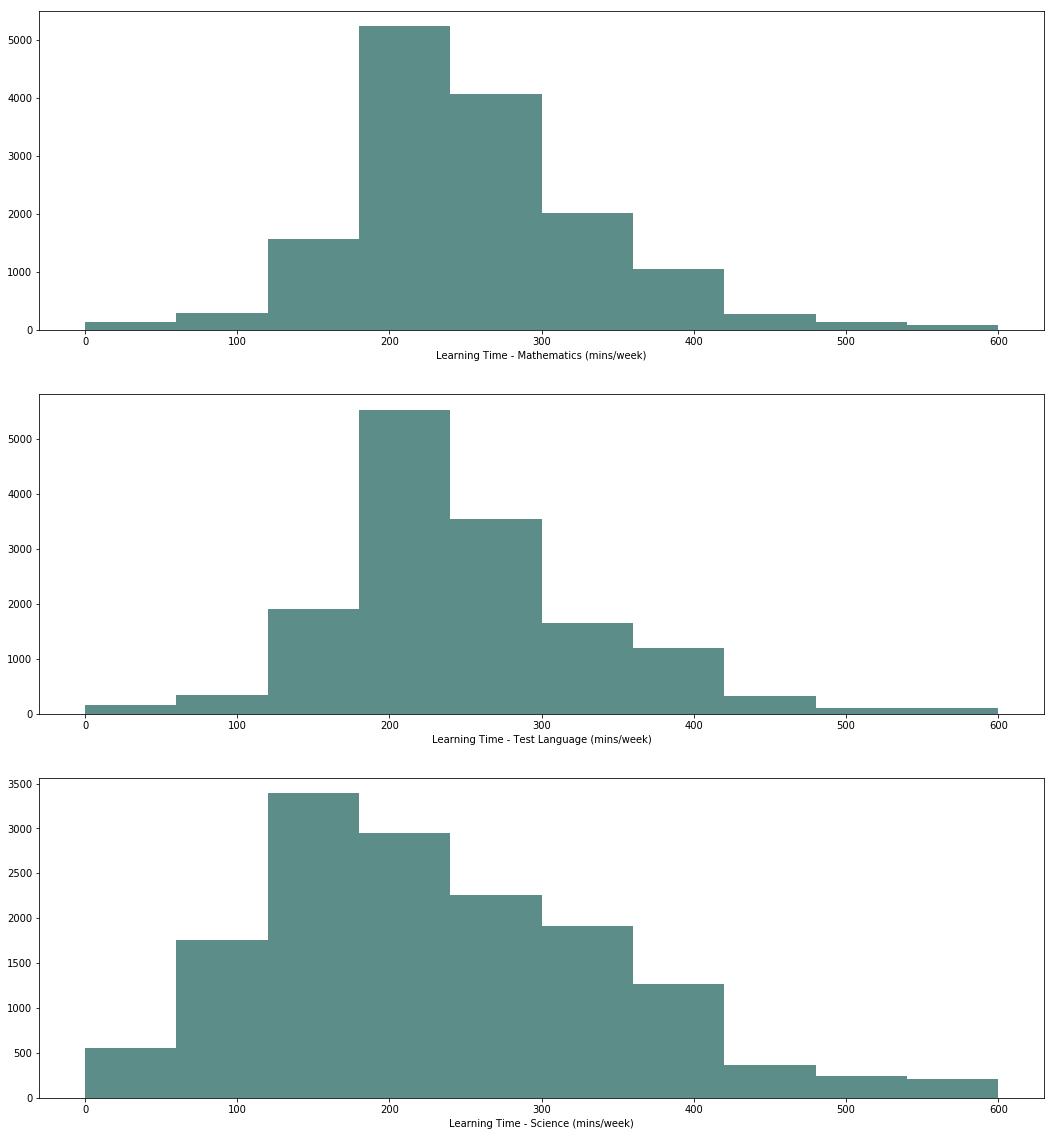

In [222]:
# Re-plotting the distributions of Learning Times
fig, ax = plt.subplots(nrows=3, figsize = [18,20])

variables = ['Learning Time - Mathematics', 'Learning Time - Test Language', 'Learning Time - Science']
for i in range(len(variables)):
    var = variables[i]
#     bins = np.arange(min(pisa[var]), max(pisa[var])+0.1, 0.1)
    ax[i].hist(data = pisa, x = var, color=color3)
    ax[i].set_xlabel('{} (mins/week)'.format(var))

plt.show()

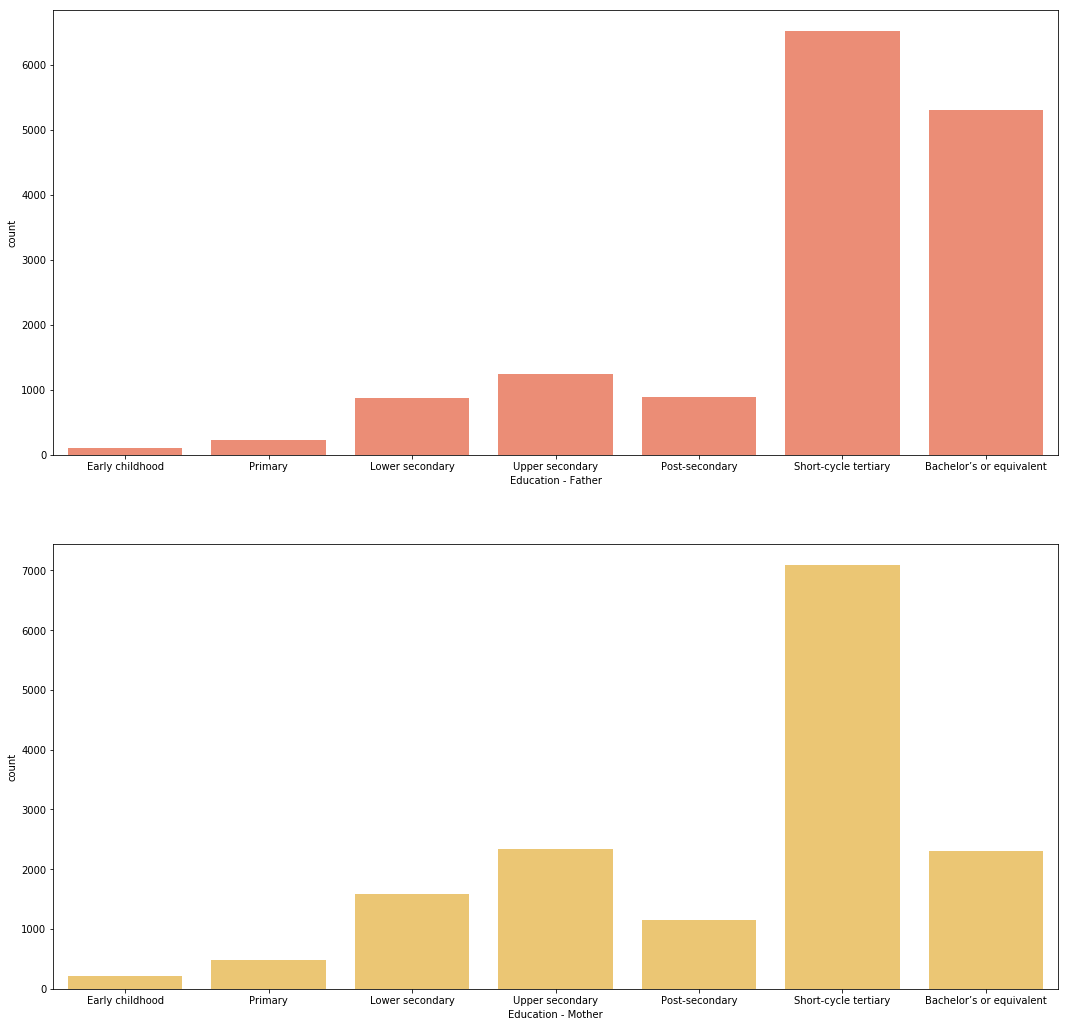

In [26]:
# The ordinal variable's distribution for both Mother's and Father's Education 
fig, ax = plt.subplots(nrows=2, figsize = [18,18])

default_color = sb.color_palette()[0]
sb.countplot(data = pisa, x = 'Education - Father', color = color_male, ax = ax[0])
sb.countplot(data = pisa, x = 'Education - Mother', color = color_female, ax = ax[1])

plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
For 'Average Total Score', the distribution was strikingly normal. However, this was expected to an extent, since student grades typically fall along a bell curve. As a result, no unusual points stood out for this variable, nor did any stand out for the three scores that resulted in the total score. Therefore, no transformations were necessary to make sense of the data. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

--

### Out-of-School Study Time and Learning Time

To start off, let's look at the correlations between each of the Scores, the Total Out-of-School Study Time, and the Total Learning Time to see if the amount of time dedicated to a subject has an influence on the score, and how strongly the Scores are correlated with one another.

In [181]:
numeric_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 'Average Total Score', 'Out-of-School Study Time - Total', 'Learning Time - Total']

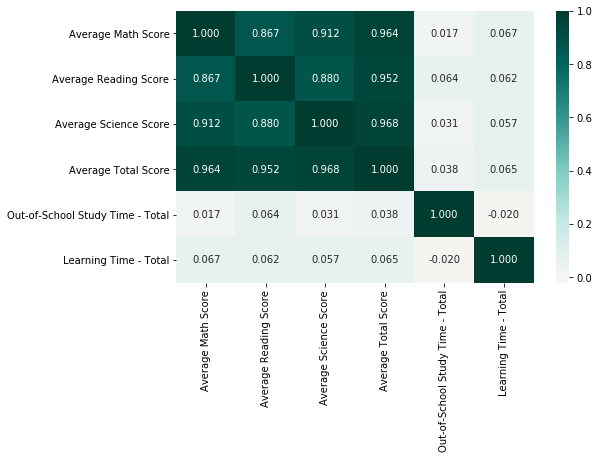

In [208]:
# Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

Considering the correlations between the Scores, the Total Out-of-School Study Time and Total Learning Time, we can see that the Total Learning Time is slightly better correlated with the scores than the Total Out-of-School Study Time, with the Average Reading Score being the exception.

To better understand the relationship between the Scores and the Learning Time, lets look at the breakdown of each of the Learning Time per subject.

In [223]:
score_learn_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Learning Time - Mathematics',
                'Learning Time - Test Language', 'Learning Time - Science', 
                'Learning Time - Total']


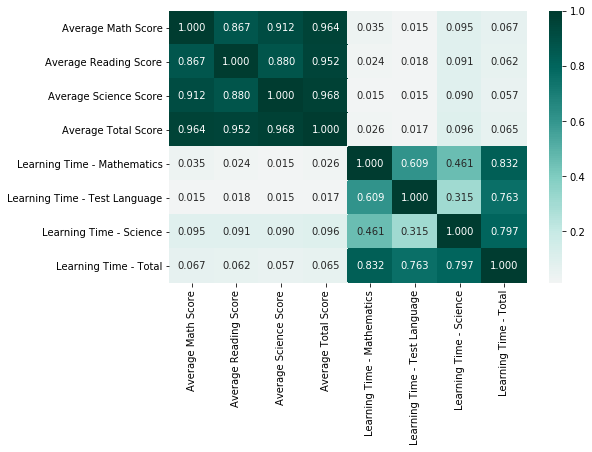

In [224]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_learn_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

Interestingly, we can see that the Learning Time for Mathematics and the Test Language have no correlation at all with any of the Scores when compared to the Learning Time for Science. 

We can look at these variables now through another perspective: seeing the scatter plot relationships between them.

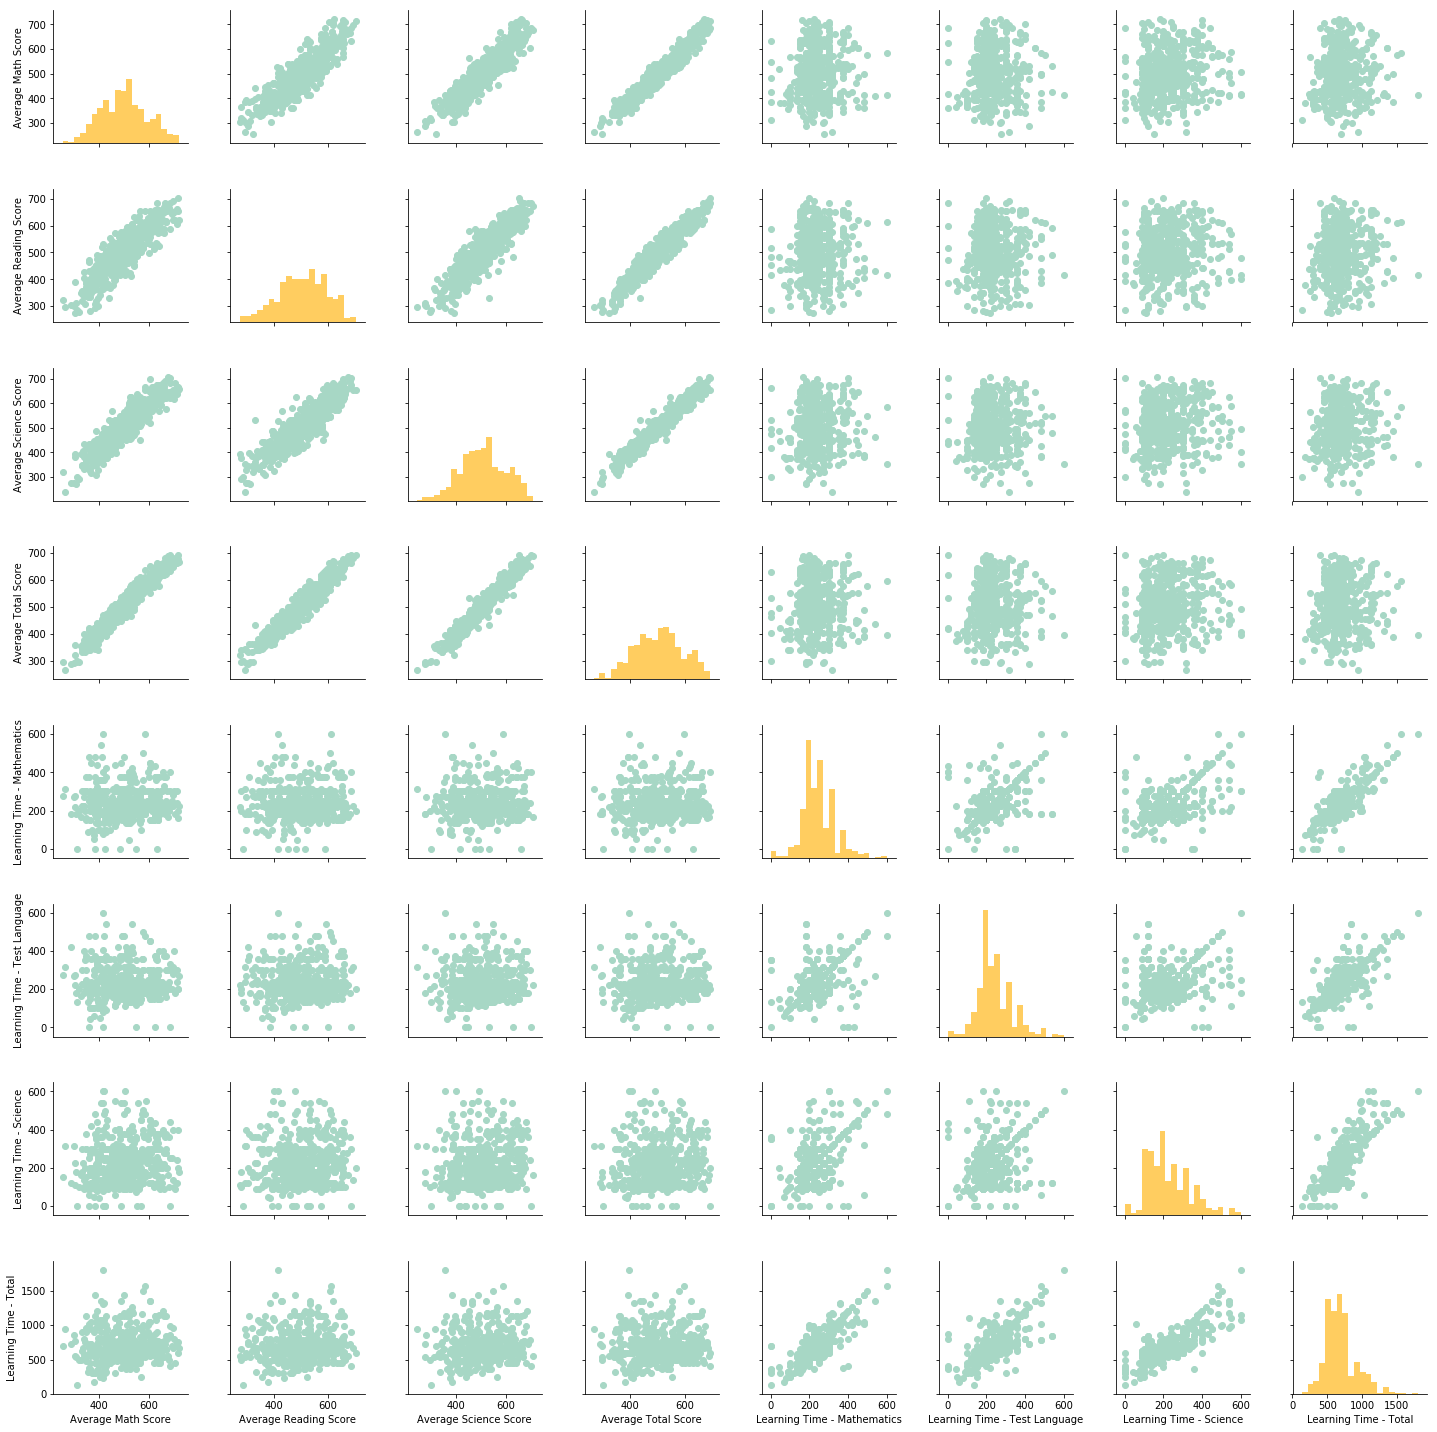

In [234]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = score_learn_vars)
g = g.map_diag(plt.hist, bins = 20, color='#ffcd60');
g.map_offdiag(plt.scatter, color = color1);

As expected, we can clearly see a strong positive correlation between each of the Scores. As for the relationships between the Learning Times, a positive relationship is visual between each of them, albeit not very strong with the exception of some outliers.

When it comes to the relationship between the Scores and Learning Times, we can see that the amount of time a study spends learning a topic has no relationship with the Score that they will receive according to this plot. 

In [226]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent', 
                      'Out-of-School Study Time - Total']

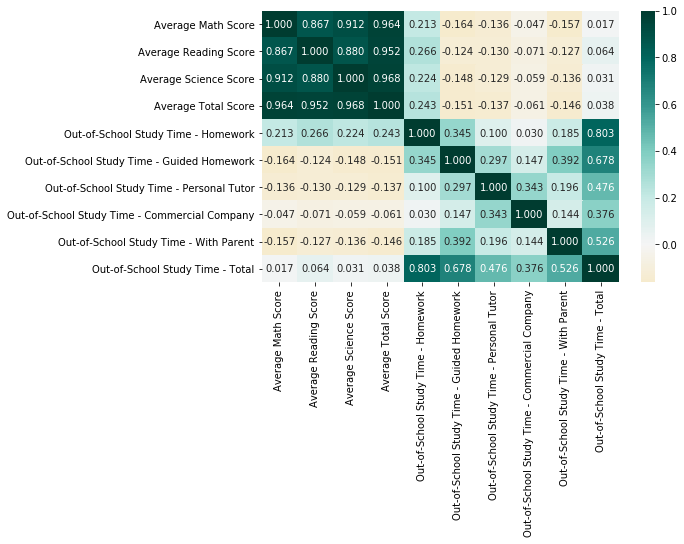

In [228]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[score_study_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

The results of this correlation plot are noteworthy in that it indicates that study time in terms of Guided Homework, with Personal Tutor, with a Commercial Company, and with a Parent have no positive influence on the score of a student. This could be related to the fact that the students who do need this amount of help are already the ones who struggle with grades, but since we have no information on previous Scores of said students, we cannot explore this theory any further for now. 

We can however, look deeper into the role of Homework in the students Score.

In [231]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score', 'Out-of-School Study Time - Homework']

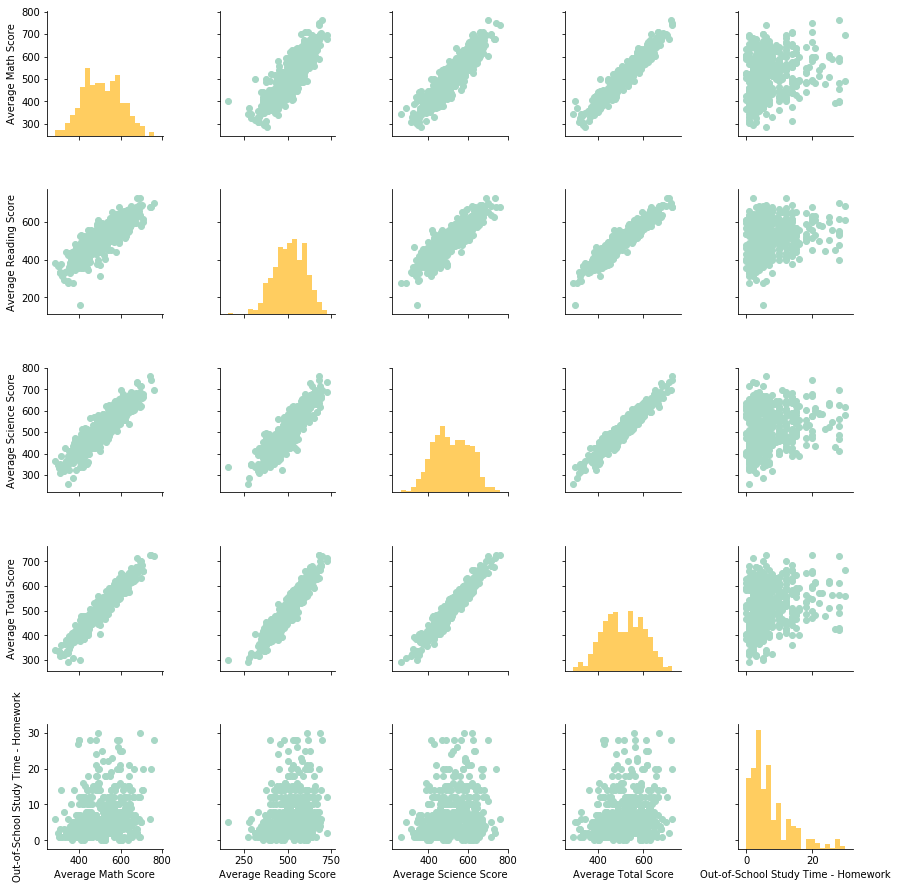

In [235]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = score_study_vars)
g = g.map_diag(plt.hist, bins = 20, color='#ffcd60');
g.map_offdiag(plt.scatter, color = color1);

Although the relationship between Homework Study Time and all the various Scores is weak, we can see that the more time a student spends on Homework, the higher their Score is. But this relationship only really exists until the Score is about 450. So for the students who are at the bottom of the Scoring rank spend time doing Homework, then they can move into the average Scores. As for the higher Scores, seems like they are generally unaffected.

Lastly, let's look at the relationship between the Study Time and Learning Time variables to see if they strongly with one another in any interesting way. 

In [212]:
time_vars = ['Out-of-School Study Time - Homework',
                      'Out-of-School Study Time - Guided Homework',
                      'Out-of-School Study Time - Personal Tutor',
                      'Out-of-School Study Time - Commercial Company',
                      'Out-of-School Study Time - With Parent',
                      'Learning Time - Mathematics',
                      'Learning Time - Test Language',
                      'Learning Time - Science']

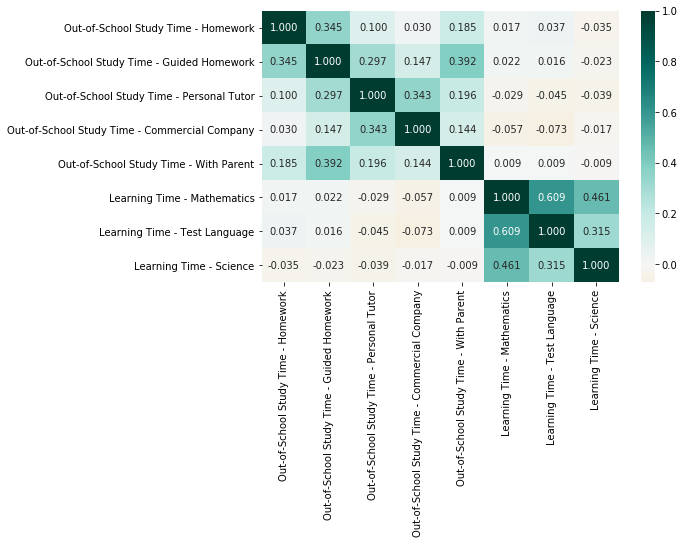

In [213]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[time_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.show()

When it comes to the Study Times and Learning Times, no relationship is visible, and they barely have any relationships with the categories themselves. So, we cannot say that certain students study within school and outside of school more than others. In general for this section, we cannot see much of an influence from Time spent learning on Scores. 

Now we can see our next set of factors that might influence the Score of a student: 

### Parental Education and Gender

To start off, let's look at the distribution of each level of education and the frequency of each.

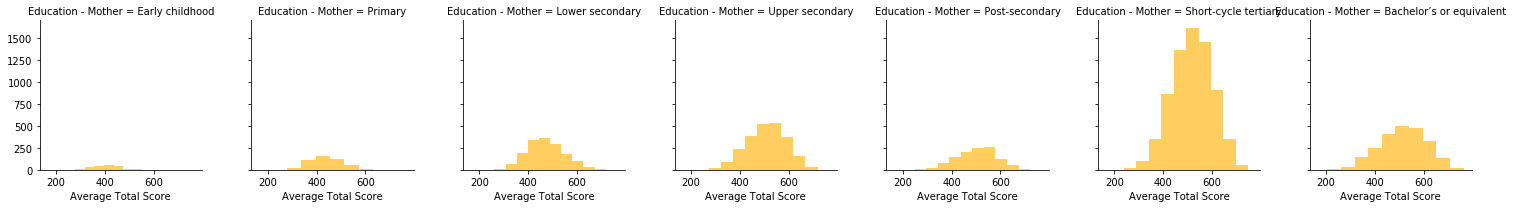

In [34]:
g = sb.FacetGrid(data = pisa, col = 'Education - Mother');
g.map(plt.hist, 'Average Total Score', color = color_female);

Here we can see that the children in this dataset frequently have mothers with a Short-cycle Tertiary Education. In terms of Scores for each level, children with mothers who have just Early Childhood education perform much worse, with distribution that does not even reach the Score of 600. Meanwhile, the highest level of Bachelor's or equivalent is slightly left skewed and goes past the 600 mark.

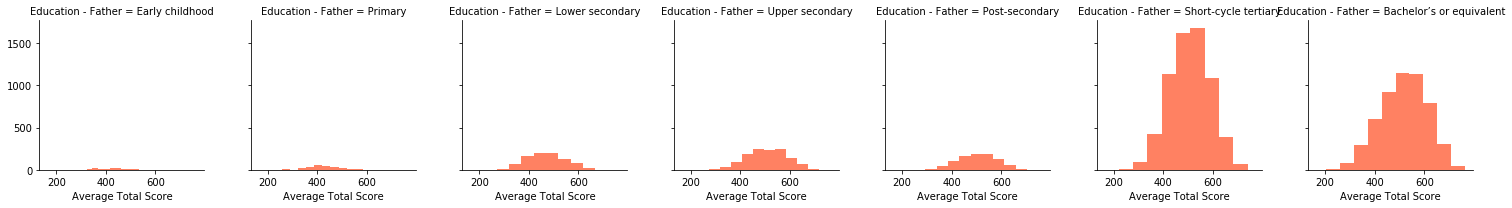

In [35]:
g = sb.FacetGrid(data = pisa, col = 'Education - Father');
g.map(plt.hist, 'Average Total Score', color = color_male);

The same can be said for the education levels for the fathers. Except here we have more fathers with Bachelor's or equivalent educations.

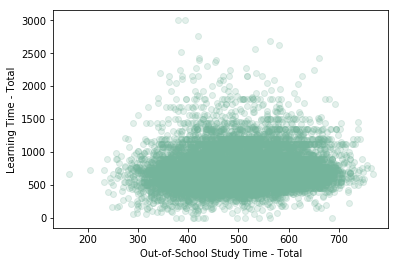

In [36]:
sb.regplot(data= pisa, x = 'Average Total Score', 
           y = 'Learning Time - Total', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5},
           color = color2)
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning Time - Total');

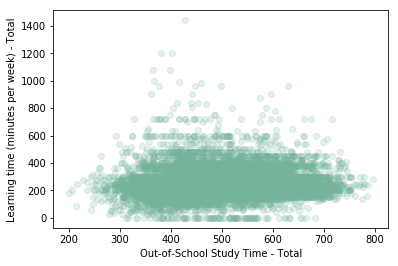

In [37]:
sb.regplot(data= pisa, x = 'Average Math Score', 
           y = 'Learning Time - Mathematics', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5},
           color = color2)
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

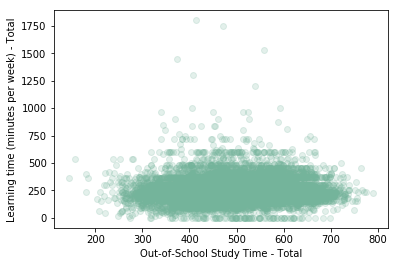

In [38]:
sb.regplot(data= pisa, x = 'Average Reading Score', 
           y = 'Learning Time - Test Language', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5},
           color = color2)
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

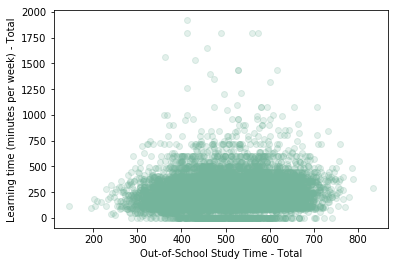

In [39]:
sb.regplot(data= pisa, x = 'Average Science Score', 
           y = 'Learning Time - Science', 
           fit_reg = False, 
           scatter_kws = {'alpha': 1/5},
           color = color2)
plt.xlabel('Out-of-School Study Time - Total')
plt.ylabel('Learning time (minutes per week) - Total');

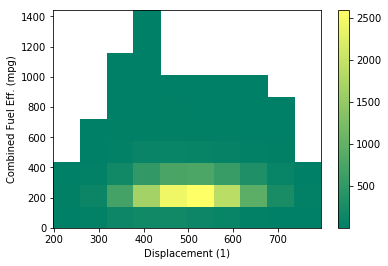

In [44]:
plt.hist2d(data = pisa, x = 'Average Math Score', 
           y = 'Learning Time - Mathematics', cmin = 0.5, cmap='summer');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

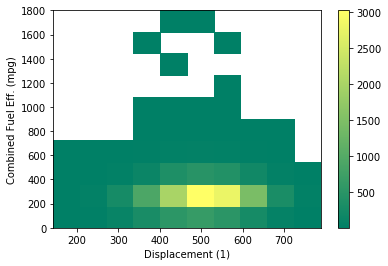

In [45]:
plt.hist2d(data = pisa, x = 'Average Reading Score', 
           y = 'Learning Time - Test Language', cmin = 0.5, cmap='summer');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

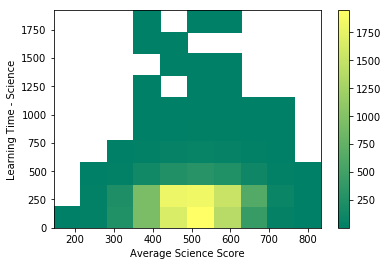

In [186]:
plt.hist2d(data = pisa, x = 'Average Science Score', 
           y = 'Learning Time - Science', cmin = 0.5, cmap='summer');
plt.colorbar()
plt.xlabel('Average Science Score')
plt.ylabel('Learning Time - Science');

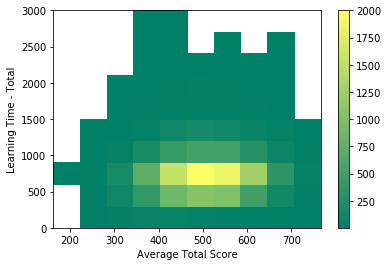

In [184]:
plt.hist2d(data = pisa, x = 'Average Total Score', 
           y = 'Learning Time - Total', cmin = 0.5, cmap = 'summer');
plt.colorbar()
plt.xlabel('Average Total Score')
plt.ylabel('Learning Time - Total');

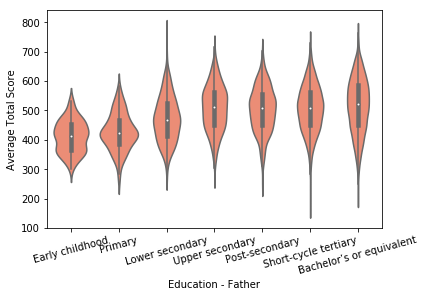

In [48]:
sb.violinplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = color_male);
plt.xticks(rotation = 15);

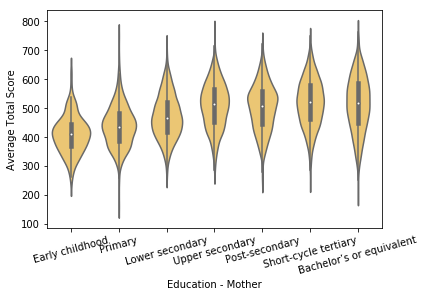

In [49]:
sb.violinplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score', 
              color = color_female);
plt.xticks(rotation = 15);

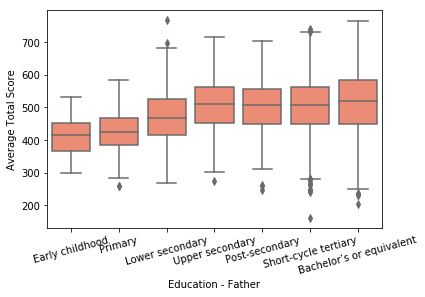

In [52]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = color_male);
plt.xticks(rotation = 15);

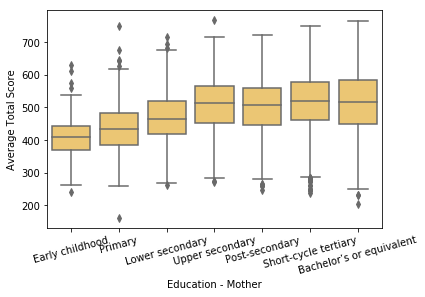

In [85]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = color_female);
plt.xticks(rotation = 15);

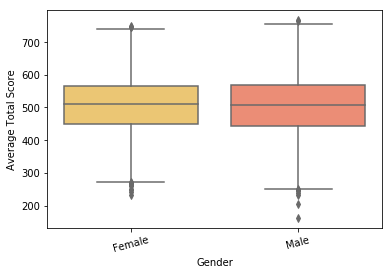

In [236]:
sb.boxplot(data = pisa, 
              x = 'Gender', 
              y = 'Average Total Score',
              palette = color_gends);
plt.xticks(rotation = 15);

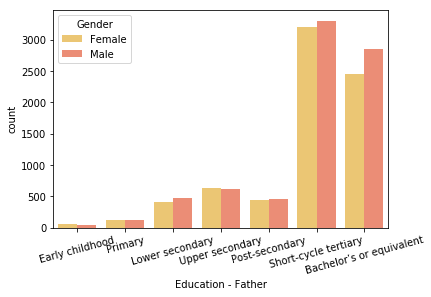

In [54]:
sb.countplot(data = pisa, x = 'Education - Father', hue = 'Gender', palette = color_gends)
plt.xticks(rotation = 15);

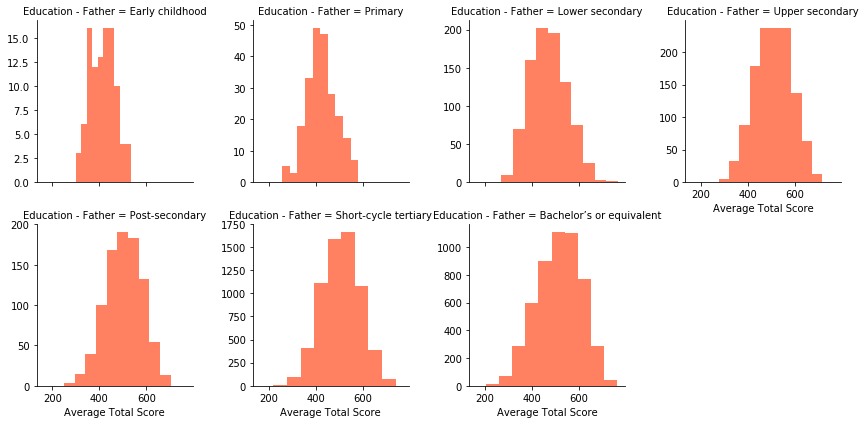

In [237]:
# fix y axis
g = sb.FacetGrid(data = pisa, 
                 col = 'Education - Father', 
                 col_wrap = 4, 
                 sharey = False);
g.map(plt.hist, 'Average Total Score', color = color_male);

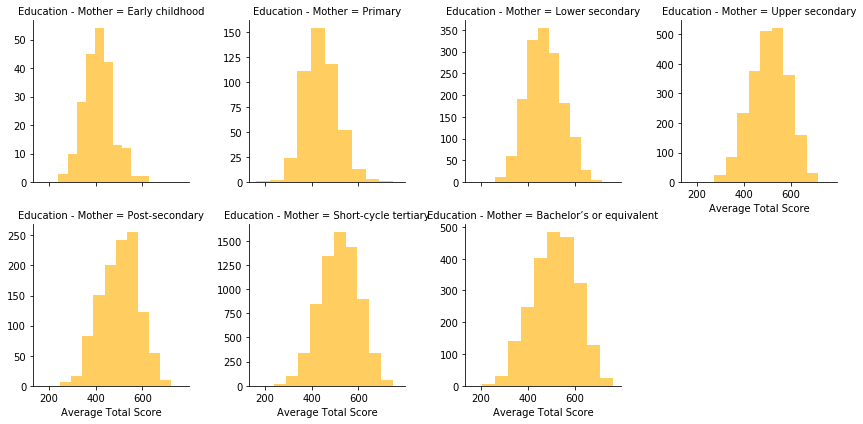

In [238]:
# fix y axis
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, sharey = False);
g.map(plt.hist, 'Average Total Score', color = color_female);

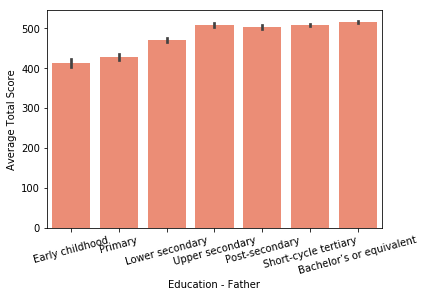

In [57]:
sb.barplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              color = color_male);
plt.xticks(rotation = 15);

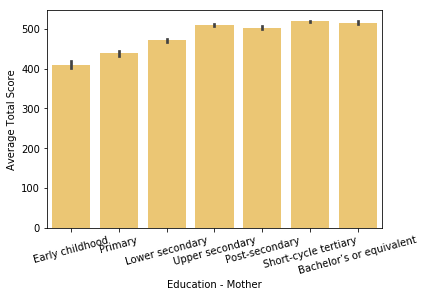

In [58]:
sb.barplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = color_female);
plt.xticks(rotation = 15);

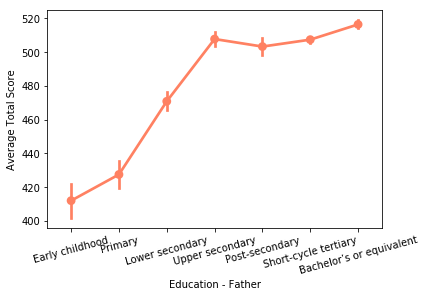

In [59]:
sb.pointplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
             color = color_male);
plt.xticks(rotation = 15);

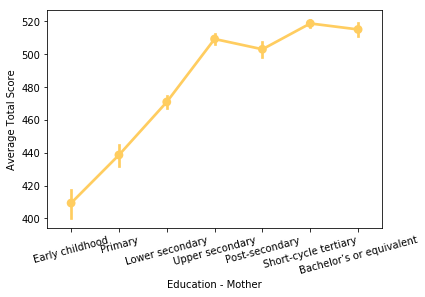

In [60]:
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = '#ffcd60');
plt.xticks(rotation = 15);

In [241]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


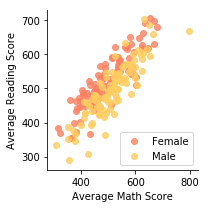

In [242]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends_r)
g.map(sb.regplot, 'Average Math Score', 'Average Reading Score', fit_reg = False)
plt.legend();

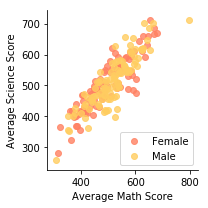

In [243]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends_r)
g.map(sb.regplot, 'Average Math Score', 'Average Science Score', fit_reg = False)
plt.legend();

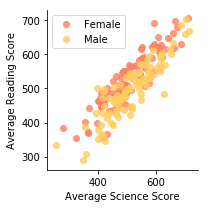

In [244]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends_r)
g.map(sb.regplot, 'Average Science Score', 'Average Reading Score', fit_reg = False)
plt.legend();

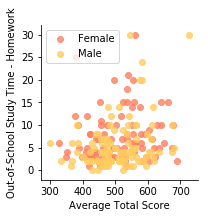

In [246]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends_r)
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Homework', fit_reg = False)
plt.legend();

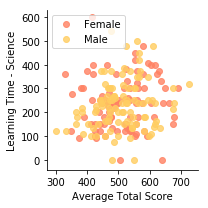

In [247]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = color_gends_r)
g.map(sb.regplot, 'Average Total Score', 'Learning Time - Science', fit_reg = False)
plt.legend();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

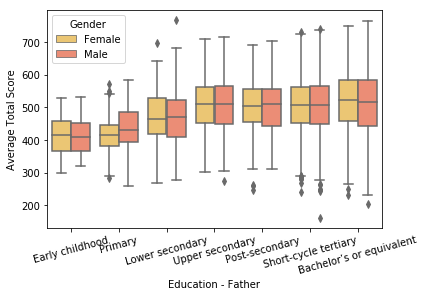

In [89]:
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              hue = 'Gender',
              palette = color_gends);
plt.xticks(rotation = 15);

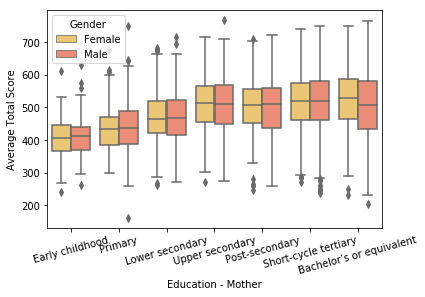

In [90]:
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              hue = 'Gender',
              palette = color_gends);
plt.xticks(rotation = 15);

In [69]:
scores = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                'Average Total Score']

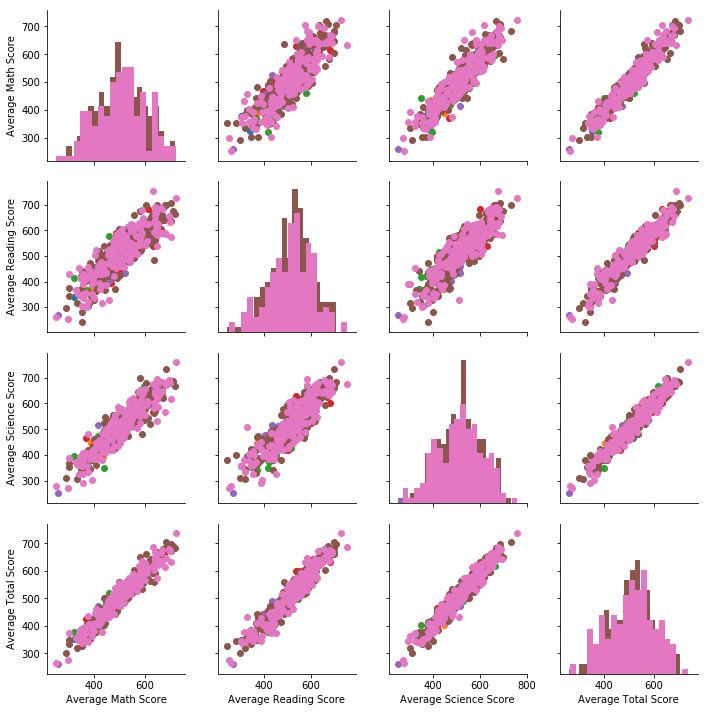

In [70]:
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = scores, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

In [91]:
study_time = ['Out-of-School Study Time - Homework', 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor','Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent']

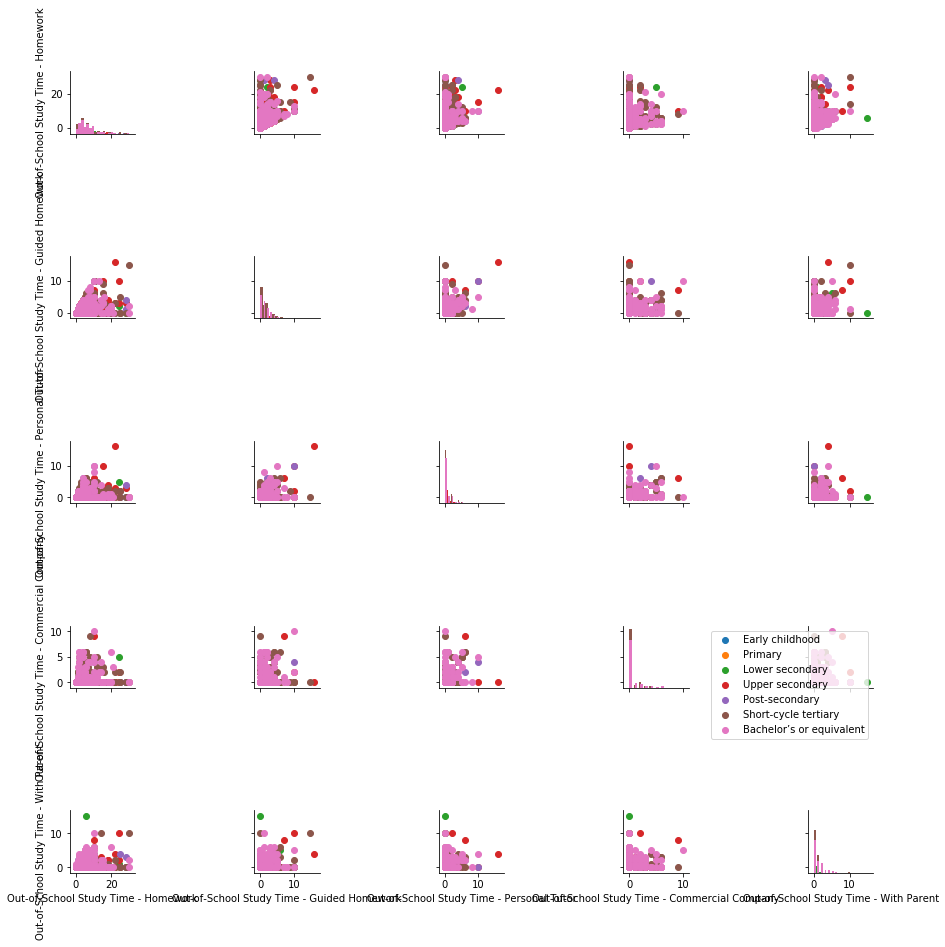

In [93]:
g = sb.PairGrid(data = pisa_samp, vars = study_time, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.legend();

In [94]:
learning_time = ['Learning Time - Mathematics', 'Learning Time - Test Language', 'Learning Time - Science']

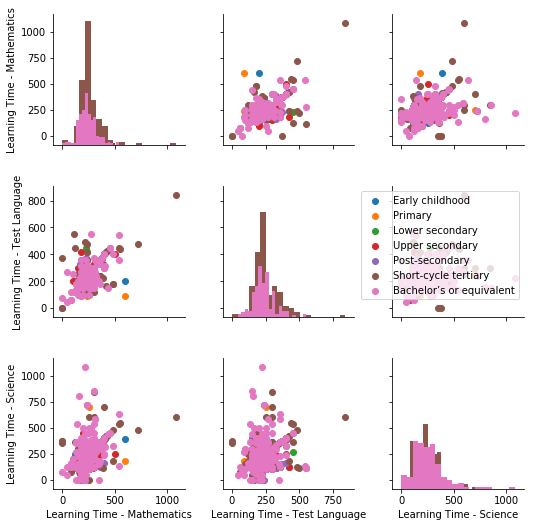

In [95]:
g = sb.PairGrid(data = pisa_samp, vars = learning_time, hue='Education - Father')
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)
plt.legend();

In [71]:
list(pisa)

['Country',
 'Student ID',
 'Gender',
 'Out-of-School Study Time - Homework',
 'Out-of-School Study Time - Guided Homework',
 'Out-of-School Study Time - Personal Tutor',
 'Out-of-School Study Time - Commercial Company',
 'Out-of-School Study Time - With Parent',
 'Learning Time - Mathematics',
 'Learning Time - Test Language',
 'Learning Time - Science',
 'Average Math Score',
 'Average Reading Score',
 'Average Science Score',
 'Average Total Score',
 'Education - Father',
 'Education - Mother',
 'Out-of-School Study Time - Total',
 'Learning Time - Total']

In [72]:
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

In [77]:
# https://python-graph-gallery.com/122-multiple-lines-chart/
# plt.plot('Out-of-School Study Time - Total', 'Average Total Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Math Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Reading Score', data=pisa )
# plt.plot('Out-of-School Study Time - Total', 'Average Science Score', data=pisa )

# plt.legend()

In [78]:
# carat_ticks = [0.2, 0.3, 0.5, 0.7, 1, 1.5, 2, 3]

In [79]:
# compute the logarithm of Average Total Score to make multivariate plotting easier
# def log_trans(x, inverse = False):
#     """ quick function for computing log and power operations """
#     if not inverse:
#         return np.log10(x)
#     else:
#         return np.power(10, x)
    
# # compute the cuberoot of Out-of-School Study Time - Total to make multivariate plotting easier
# def cuberoot_trans(x, inverse = False):
#     """ quick function for computing cube root and cube operations """
#     if not inverse:
#         return x ** (1/3)
#     else:
#         return x ** 3
    
    
# pisa['log_score'] = pisa['Average Total Score'].apply(log_trans)
# pisa['cr_time'] = pisa['Out-of-School Study Time - Total'].apply(cuberoot_trans)

In [80]:
# pisa_countries.head()

NameError: name 'pisa_countries' is not defined

In [ ]:
# pisa_cnt = pisa_countries.copy()

In [ ]:
# pisa_cnt = pisa_cnt.reset_index()

In [ ]:
# pisa_cnt.head()

In [82]:
# sb.regplot(data= pisa_cnt, x = 'Out-of-School Study Time - Total', 
#            y = 'Average Total Score', 
#            fit_reg = False)
# plt.xlabel('Out-of-School Study Time - Total')
# plt.ylabel('Learning time (minutes per week) - Total');

NameError: name 'pisa_cnt' is not defined

In [ ]:
# sb.pointplot(data = pisa, 
#               x = 'Out-of-School Study Time - Total', 
#               y = 'Average Total Score');
# plt.xticks(rotation = 15);

In [ ]:
pisa.head()

/Users/gabriela/Desktop/Code/myenv/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


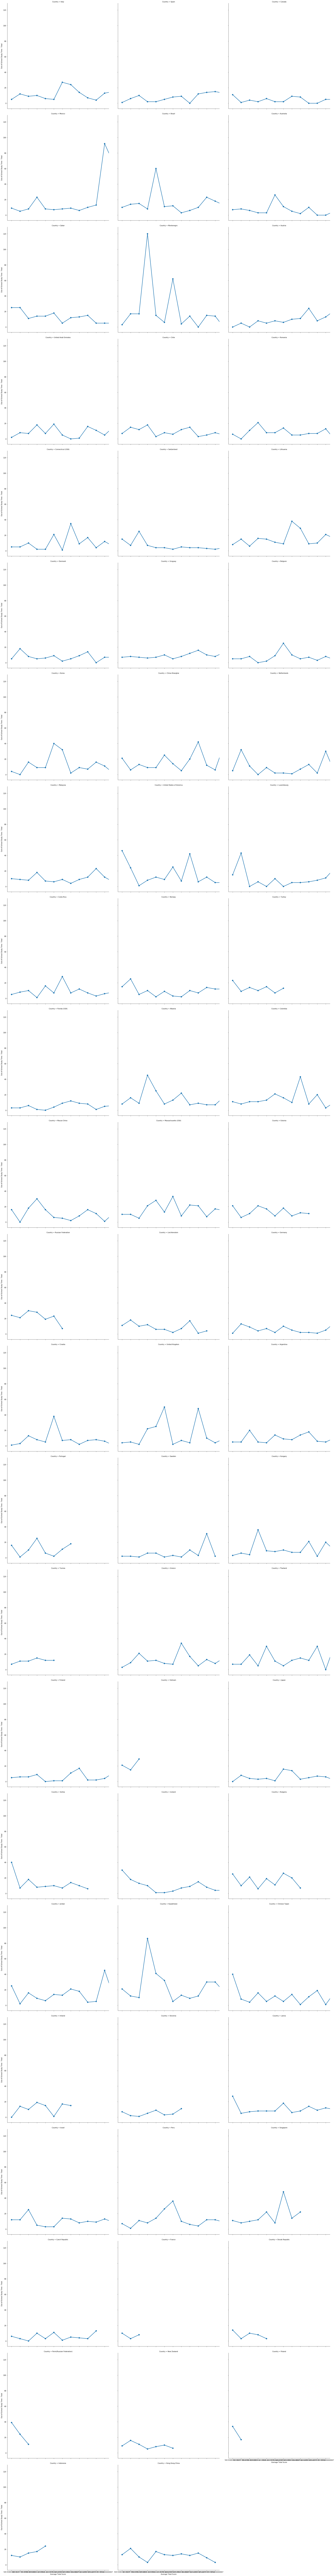

In [81]:
############
g = sb.FacetGrid(pisa, col='Country', col_wrap=3, height=10)
g = g.map(sb.pointplot, 'Average Total Score', 'Out-of-School Study Time - Total')

In [ ]:
pisa_countries = pisa.groupby('Country').mean()
pisa_countries = pisa_countries.reset_index(name = 'Country')
pisa_countries = pisa_countries.pivot(index = 'Country', columns = 'Average Total Score', values = 'count')

In [ ]:
pisa_countries

In [ ]:
g = sb.FacetGrid(pisa, col="Country", col_wrap=3, height=10)
g = g.map(plt.plot, 'log_score', 'cr_time')


# sb.heatmap(ct_counts, annot = True, fmt = 'd');
# fmt makes them into decimal values aka readable

In [ ]:
# for each country, average score and time studied

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!